Epoch 50/300 - Train RMSE: 262.03, Val RMSE: 261.82
Epoch 100/300 - Train RMSE: 262.03, Val RMSE: 261.82
Epoch 150/300 - Train RMSE: 262.03, Val RMSE: 261.82
Epoch 200/300 - Train RMSE: 262.03, Val RMSE: 261.82
Epoch 250/300 - Train RMSE: 262.03, Val RMSE: 261.82
Epoch 300/300 - Train RMSE: 262.03, Val RMSE: 261.82

===== SGD REGRESSOR FINAL PERFORMANCE =====
MAE:  175.725
RMSE: 261.824
R²:   0.934


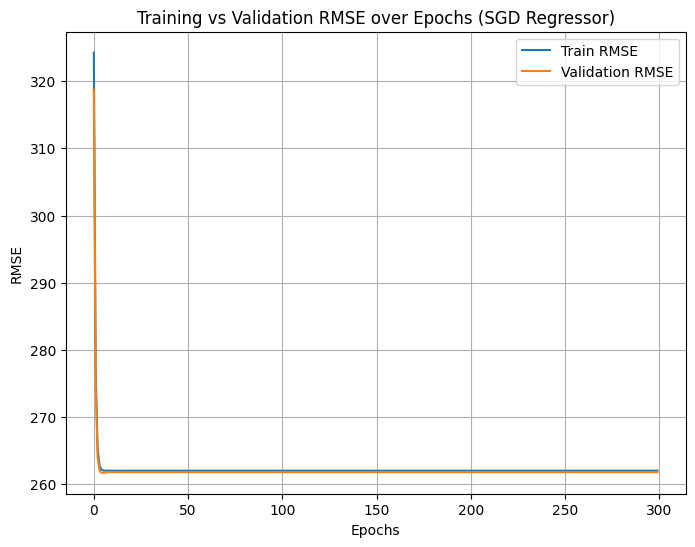

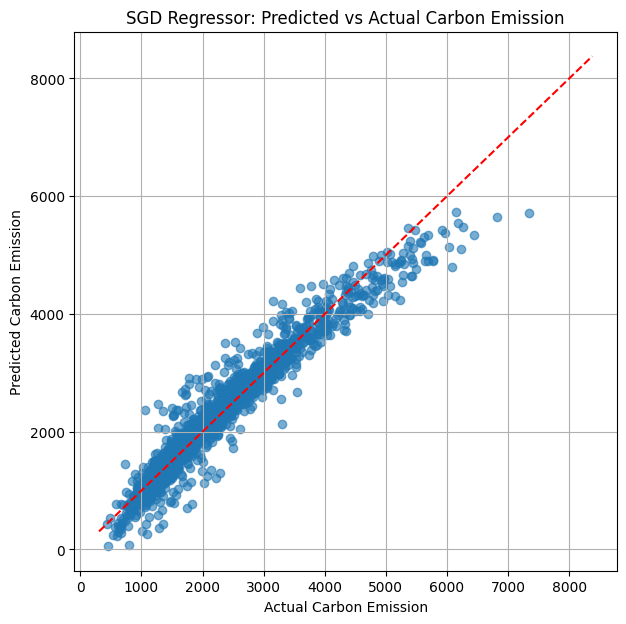

In [2]:
# ============================================
#  CARBON EMISSION PREDICTOR — SGD REGRESSOR (WITH EPOCH RMSE TRACKING)
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ----------------------------
# 1. LOAD DATA
# ----------------------------
df = pd.read_csv(r"C:\Users\heemi\Downloads\enviro-meter\Carbon-emission\Carbon Emission.csv")
df.columns = df.columns.str.strip()

target = "CarbonEmission"
X = df.drop(columns=[target])
y = df[target]

categorical_features = X.select_dtypes(include=["object"]).columns.tolist()
numerical_features = X.select_dtypes(exclude=["object"]).columns.tolist()

# ----------------------------
# 2. PREPROCESSING PIPELINE
# ----------------------------
numeric_transformer = Pipeline([
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline([
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numerical_features),
    ("cat", categorical_transformer, categorical_features)
])

# ----------------------------
# 3. SPLIT DATA
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ----------------------------
# 4. PREPROCESS DATA
# ----------------------------
X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)

# ----------------------------
# 5. DEFINE SGD REGRESSOR
# ----------------------------
sgd_model = SGDRegressor(
    max_iter=1,          # we will manually iterate epochs
    tol=None,
    learning_rate="invscaling",
    eta0=0.01,
    warm_start=True,     # allows continuing training
    random_state=42
)

# ----------------------------
# 6. TRAIN MODEL EPOCH-WISE
# ----------------------------
n_epochs = 300
train_rmse = []
val_rmse = []

for epoch in range(n_epochs):
    sgd_model.fit(X_train_proc, y_train)  # continues from previous iteration
    y_train_pred = sgd_model.predict(X_train_proc)
    y_val_pred = sgd_model.predict(X_test_proc)
    
    train_rmse.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    val_rmse.append(np.sqrt(mean_squared_error(y_test, y_val_pred)))
    
    if (epoch+1) % 50 == 0:
        print(f"Epoch {epoch+1}/{n_epochs} - Train RMSE: {train_rmse[-1]:.2f}, Val RMSE: {val_rmse[-1]:.2f}")

# ----------------------------
# 7. FINAL EVALUATION
# ----------------------------
y_pred = sgd_model.predict(X_test_proc)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n===== SGD REGRESSOR FINAL PERFORMANCE =====")
print(f"MAE:  {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²:   {r2:.3f}")

# ----------------------------
# 8. PLOT TRAINING VS VALIDATION RMSE
# ----------------------------
plt.figure(figsize=(8,6))
plt.plot(range(n_epochs), train_rmse, label="Train RMSE")
plt.plot(range(n_epochs), val_rmse, label="Validation RMSE")
plt.xlabel("Epochs")
plt.ylabel("RMSE")
plt.title("Training vs Validation RMSE over Epochs (SGD Regressor)")
plt.legend()
plt.grid(True)
plt.show()

# ----------------------------
# 9. PREDICTED VS ACTUAL PLOT
# ----------------------------
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Carbon Emission")
plt.ylabel("Predicted Carbon Emission")
plt.title("SGD Regressor: Predicted vs Actual Carbon Emission")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--")
plt.grid(True)
plt.show()
